### **SOW-MKI49-2019-SEM1-V: NeurIPS**

# Project: Skeleton Code

In [1]:
class NeurosmashAgent:
    def __init__(self):
        pass

    def step(self, info, reward, state):
        #return 0 # no action
        #return 1 # left action
        #return 2 # right action
        #return 3 # built-in random action
        return 4 # built-in ai action

In [2]:
import random
import socket
import struct

class NeurosmashEnvironment:
    def __init__(self, ip = "127.0.0.1", port = 13000):
        self.client = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        self.ip     = ip
        self.port   = port

        self.client.connect((ip, port))

    def init(self):
        self._send(0, 1)
        return self._receive()

    def step(self, action):
        self._send(action, 2)
        return self._receive()

    def _receive(self):
        data   = self.client.recv(1 + 1 + 256 * 256 * 3)
        info   = data[0]
        reward = data[1]
        state  = [data[i] for i in range(2, len(data))]
        return info, reward, state

    def _send(self, action, transition):
        self.client.send(bytes([action, transition]))

In [3]:
agent       = NeurosmashAgent()
environment = NeurosmashEnvironment()

In [4]:
info, reward, state = environment.init()

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL.ImageOps import equalize, autocontrast
from PIL import Image

In [39]:
action = agent.step(info, reward, state)
info, reward, state = environment.step(action)

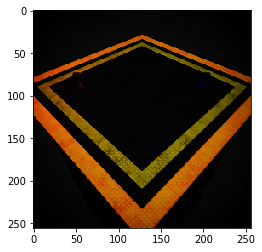

In [48]:
img = np.array(state).reshape(3,256,256).transpose(1,2,0)[::-1]
plt.imshow(img)

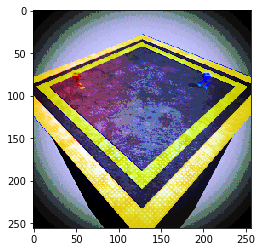

In [66]:
img = np.array(state).reshape(3,256,256).transpose(1,2,0)[::-1]

b, g, r = cv2.split(img)

r = Image.fromarray(np.uint8(r))
r = equalize(r)
#r = autocontrast(r)
r = np.array(r)

g = Image.fromarray(np.uint8(g))
g = equalize(g)
#g = autocontrast(g)
g = np.array(g)

b = Image.fromarray(np.uint8(b))
b = equalize(b)
#b = autocontrast(b)
b = np.array(b)

img = cv2.merge((b,g,r))

plt.imshow(img)
plt.show()

In [68]:
cv2.imwrite('agents.png', img)

True

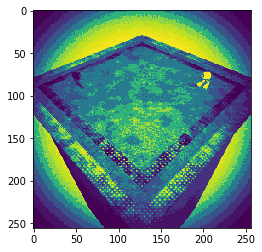

In [70]:
plt.imshow(r)

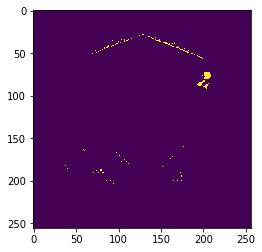

In [95]:
plt.imshow(np.where(r >= 254, 1, 0))

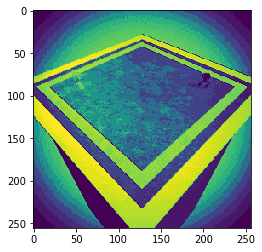

In [98]:
plt.imshow(b)

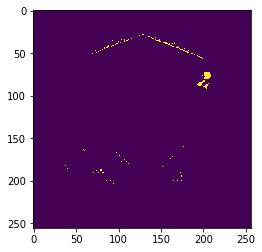

In [95]:
plt.imshow(np.where(r >= 254, 1, 0))

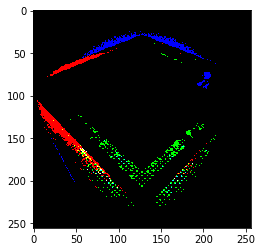

In [86]:
plt.imshow(cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)[1])